**Downlaod packages**

In [ ]:
# download necessary libraies
# pip install numpy pandas matplotlib plotly wordcloud nltk
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

**Load the libraries**

In [1]:
# load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words()
from collections import Counter
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Google Drive**

In [2]:
# access Google Drive within your Colab notebook.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!pwd

Mounted at /content/drive
/content


In [3]:
# reading the csv file from google drive
movie_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/movie_dataset.csv")
print(movie_df.head(1))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive


**Loading the dataset from Colab**

In [59]:
# loading the dataset from colab notebook itself using pandas library
# movie_df = pd.read_csv("/content/movie_dataset.csv", error_bad_lines=False)

**EDA**

In [62]:
# inspecting the dataframe 'movie_df'
print(movie_df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [63]:
# get a concise summary of a DataFrame,
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [64]:
# counting the class of sentiment column
movie_df['sentiment'].value_counts()
# Positive and Negative sentiments

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [65]:
# listing the columns from dataframe
movie_df.columns

Index(['review', 'sentiment'], dtype='object')

In [66]:
# check for any null values
print(movie_df.isnull().sum())

review       0
sentiment    0
dtype: int64


<Axes: >

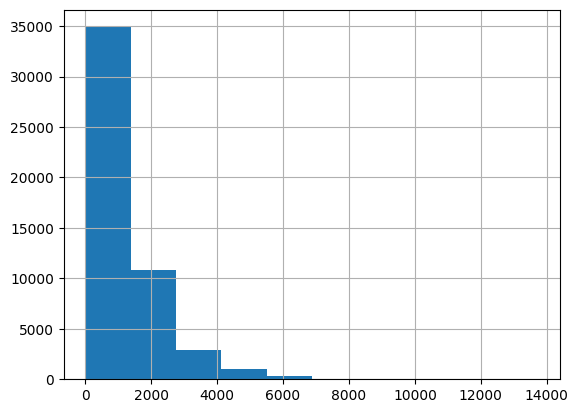

In [67]:
# Calculate the length of each review and plot a histogram
movie_df['review'].str.len().hist()

**Data Preprocessing**

In [68]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing involves removal of urls, html tags, contarctions, special characters, emojis
# and lowercasing the text to get data consistency

def cleaning(text):
    try:
        # Ensure 'text' is a string
        text = str(text)

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove HTML tags
        text = re.sub('<.*?>', '', text)

        # Remove contractions
        contraction_pattern = re.compile(r'\b(?:isn\'t|aren\'t|wasn\'t|weren\'t|haven\'t|hasn\'t|hadn\'t|won\'t|wouldn\'t|don\'t|doesn\'t|didn\'t|can\'t|couldn\'t|shouldn\'t)\b')
        text = contraction_pattern.sub('', text)

        # Remove special characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Convert to lowercase
        text = text.lower()



        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return ''
movie_df['review'] = movie_df['review'].apply(cleaning)

In [69]:
# displaying the columns
movie_df.columns

Index(['review', 'sentiment'], dtype='object')

In [70]:
# displaying the dataframe
movie_df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [71]:
# remove stop word from review
movie_df['review'] = movie_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [72]:
# displaying the dataframe
movie_df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,positive
1,wonderful production filming technique unassum...,positive
2,wonderful spend time hot summer weekend sittin...,positive
3,basically family boy jake thinks zombie closet...,negative
4,petter matteis love time money visually stunni...,positive


In [73]:
# Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in movie_df["review"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,83514
1,film,74466
2,time,23267
3,story,22046
4,great,17719
5,movies,15430
6,made,15408
7,films,15290
8,make,15284
9,characters,14656


In [74]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
movie_df["review"] = movie_df["review"].apply(lambda text: remove_freqwords(text))
movie_df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,positive
1,wonderful production filming technique unassum...,positive
2,wonderful spend hot summer weekend sitting air...,positive
3,basically family boy jake thinks zombie closet...,negative
4,petter matteis love money visually stunning wa...,positive


In [75]:
# lemmatizing to get root form
wordnet_lem = WordNetLemmatizer()

movie_df['review'] = movie_df['review'].apply(wordnet_lem.lemmatize)
movie_df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,positive
1,wonderful production filming technique unassum...,positive
2,wonderful spend hot summer weekend sitting air...,positive
3,basically family boy jake thinks zombie closet...,negative
4,petter matteis love money visually stunning wa...,positive


In [76]:
# getting more knowledge related to positive Review
text = " ".join(i for i in movie_df[movie_df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)
print(wordcloud)

positive_words_list = list(wordcloud.words_.keys())
positive_words_string = ", ".join(positive_words_list)

# Print the positive words as a comma-separated string
positive_words_list = (positive_words_string.split(", "))
print("Positive Words:", positive_words_list)

Positive Words: ['show', 'scene', 'love', 'life', 'character', 'work', 'find', 'year', 'part', 'watch', 'play', 'lot', 'world', 'actor', 'performance', 'makes', 'back', 'plot', 'real', 'director', 'feel', 'role', 'fact', 'day', 'friend', 'live', 'things', 'serie', 'bit', 'guy', 'acting', 'family', 'set', 'music', 'young', 'funny', 'girl', 'course', 'hes', 'especially', 'kind', 'times', 'probably', 'point', 'episode', 'put', 'moment', 'played', 'pretty', 'found', 'watching', 'interesting', 'action', 'kid', 'star', 'excellent', 'give', 'turn', 'comedy', 'long', 'big', 'beautiful', 'audience', 'believe', 'fun', 'start', 'wonderful', 'original', 'father', 'line', 'horror', 'classic', 'place', 'ive', 'making', 'woman', 'different', 'perfect', 'shot', 'short', 'loved', 'cast', 'reason', 'viewer', 'idea', 'wife', 'nice', 'american', 'enjoy', 'ending', 'boy', 'remember', 'takes', 'mind', 'problem', 'version', 'job', 'picture', 'amazing', 'book', 'song', 'mother', 'death', 'script', 'today', 'h

In [77]:
# converting the "sentiment" to numerical values. No label encoding is used here.
# It assigns 0 to "negative" sentiment and 1 to 'positive sentiment, for machine to understand.

movie_df['sentiment'] = [0 if each == "negative" else 1 for each in movie_df['sentiment']]
movie_df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode youl...,1
1,wonderful production filming technique unassum...,1
2,wonderful spend hot summer weekend sitting air...,1
3,basically family boy jake thinks zombie closet...,0
4,petter matteis love money visually stunning wa...,1


In [78]:
# tokenize the text to get individual words for 'review' column
tokenized_review=movie_df['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [reviewers, mentioned, watching, 1, oz, episod...
1    [wonderful, production, filming, technique, un...
2    [wonderful, spend, hot, summer, weekend, sitti...
3    [basically, family, boy, jake, thinks, zombie,...
4    [petter, matteis, love, money, visually, stunn...
Name: review, dtype: object

**Feature Extraction**

In [79]:
# Since TFIDF is giving low accuarcy. So, CountVectorizer is used instead

from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer # regular expression tokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+') # tokenizes the text based on alphanumeric characters.

cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# use stopwords & unigrams

# vectorizer to "review" column and transforms the text into a sparse matrix of token counts.
text_counts = cv.fit_transform(movie_df['review'])
text_counts

<50000x219807 sparse matrix of type '<class 'numpy.int64'>'
	with 3703445 stored elements in Compressed Sparse Row format>

In [80]:
# train-test split usig sklearn

from sklearn.model_selection import train_test_split
X=text_counts # input
y=movie_df['sentiment'] # output

# split the training data into 80% from overall data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

**Model Building**

we can also use lazypredict() to comapre the models

**Naive Bayes**

In [81]:
# fit the training dataframe
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

# predict the testing dataframe
from sklearn import metrics
predicted = CNB.predict(X_test)
print()

# Predicting the accuarcy
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print()
print()

# Plot the confusion matrix for classification model
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print()
print()

# generate classification report for predicting evaluation metrics
print('Classification Report:')
print(classification_report(y_test, predicted))

# Conclusion: Got an accuracy of 87%.


ComplementNB model accuracy is 86.56%


Confusion Matrix:
      0     1
0  4342   635
1   709  4314


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4977
           1       0.87      0.86      0.87      5023

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



**SVM model**

In [ ]:
# from sklearn.svm import SVC
# svm_model = SVC(kernel='linear')

# # Train the model
# svm_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svm_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # Display classification report
# print("Classification Report:\n", classification_report(y_test, y_pred))
# Conclusion: unable to connect to the run time

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

# Conclusion: Got an accuracy of 88%.

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
# Make predictions
predictions = rf_classifier.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)

# Print classification report
print(classification_report(y_test, predictions))
# Conclusion: Got an accuracy of 86%.


In [ ]:
# Grid searchCV- Hyper Parameter Turning (optional)
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Create a RandomForestClassifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Define hyperparameters to search
# param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# # Perform grid search
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Train the model with the best parameters
# best_rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'],
#                                             max_depth=best_params['max_depth'],
#                                             random_state=42)
# best_rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = best_rf_classifier.predict(X_test)

# # Evaluate accuracy
# accuracy = accuracy_score(y_test, predictions)

# # Print classification report
# print(f"Best Hyperparameters: {best_params}")
# print(f"Accuracy: {accuracy:.2f}")
# print(classification_report(y_test, predictions))


# From the above models, Logistic Regression gives more accuarcy. Accuracy depends on number od rows. Here, 50000 data are used.

**Testing the model(unseen data)**

In [22]:
# testing the model using review-cleaning the text
new_review = "This movie was great! I loved the storyline."
preprocessed_review =cleaning(new_review)
preprocessed_review

'this movie was great i loved the storyline'

In [24]:
# removal of stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
preprocessed_review = ' '.join([word for word in preprocessed_review.split() if word.lower() not in stop_words])
print(preprocessed_review)

movie great loved storyline


In [26]:
# remove frequent words
def remove_freqwords_from_string(text):
    return " ".join([word for word in text.split() if word not in FREQWORDS])

preprocessed_review = remove_freqwords_from_string(preprocessed_review)
print(preprocessed_review)


loved storyline


In [27]:
# lemmetization
preprocessed_review = ' '.join([wordnet_lem.lemmatize(word) for word in preprocessed_review.split()])
print(preprocessed_review)

loved storyline


In [29]:
# tokenize the text into words
tokenized_review = word_tokenize(preprocessed_review)
tokenized_review

['loved', 'storyline']

In [45]:
# CountVectorizer-transorm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
combined_text = ' '.join(tokenized_review)
text_counts = cv.transform([combined_text])
text_counts

<1x219807 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [46]:
# predicting the sentiment using logistic regression
from sklearn import metrics
y_pred = logreg_model.predict(text_counts)

# Print the predicted sentiment
print("Predicted Sentiment:", y_pred)

Predicted Sentiment: [1]


In [ ]:
# Convert numerical predictions to text labels
# y_pred_ext = lb.inverse_transform(y_pred_numerical) # label encoding not used

In [51]:
# mapping the sentiments
y_pred_text = ['negative' if pred == 0 else 'positive' for pred in y_pred]

# Print the predicted sentiment
print("Predicted Sentiment:", ' '.join(y_pred_text))

Predicted Sentiment: positive
